In [1]:
import warnings

warnings.filterwarnings("ignore")

# Introducci√≥n a la Estad√≠stica Espacial

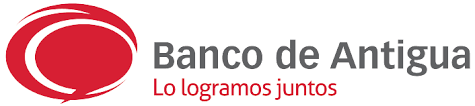

## <font color="#229966">Vamos a trabajar con las bases de comunas y distritos escolares</font>

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pathlib import Path

DATA_PATH = Path().cwd().parent.absolute() / "data"

mismos crs?: True


<Axes: >

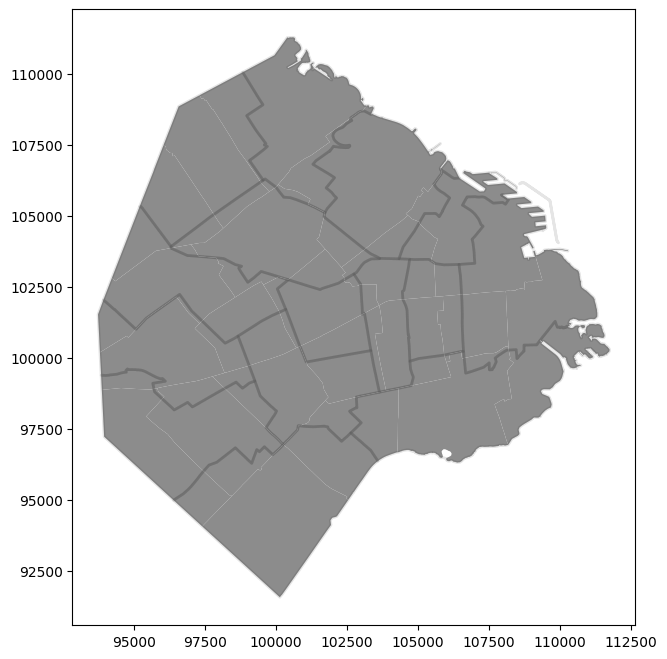

In [4]:
# leer la cartograf√≠a de comunas
com = gpd.read_file(DATA_PATH / "comunas/comunas.shp")
com

# leer los datos de distritos escolares
dis = gpd.read_file(DATA_PATH / "schools/distritos_escolares.shp")

# chequear que tengan la misma proyeccion
print("mismos crs?:", dis.crs == com.crs)

# hacer un plot para observar la cartografia
fig, ax = plt.subplots(1, figsize=(8, 8))
dis.plot(
    ax=ax, facecolor="grey", alpha=1
)  # distritos escolares l√≠neas finitas y claritas
com.plot(ax=ax, facecolor="white", edgecolor="black", alpha=0.1, linewidth=2)
# comunas l√≠neas gruesas y oscuras

<Axes: >

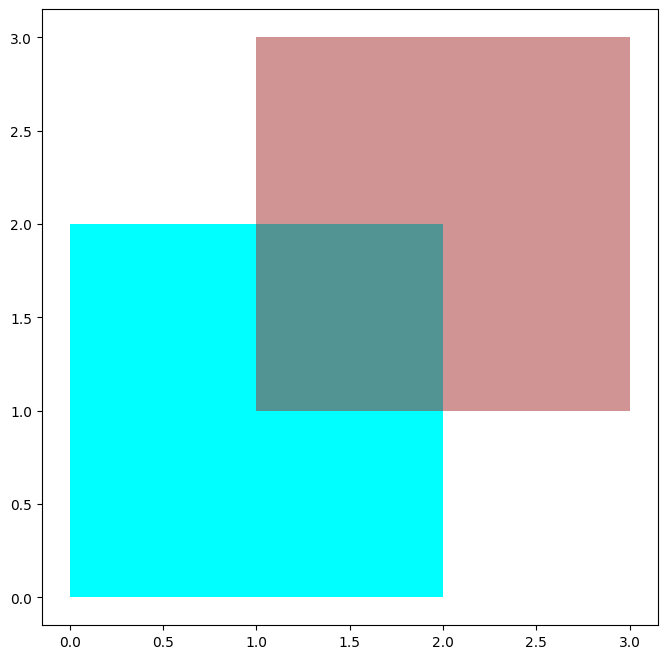

In [5]:
# importamos las funciones de shapely que nos permiten crear y manipular objetos geometricos
from shapely.geometry import Polygon, Point, LineString

polys1 = gpd.GeoSeries([Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])])

polys2 = gpd.GeoSeries([Polygon([(1, 1), (3, 1), (3, 3), (1, 3)])])


A = gpd.GeoDataFrame({"geometry": polys1, "letra": ["A"]})
B = gpd.GeoDataFrame({"geometry": polys2, "letra": ["B"]})

f, ax = plt.subplots(1, figsize=(8, 8))
A.plot(ax=ax, color="cyan")
B.plot(ax=ax, color="brown", alpha=0.5)

In [6]:
A # inspeccionamos el objeto A

geometry letra
0  POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....     A

# <font color="#229966">Realizamos el proceso de union</font>

Unimos ambos geoDataFrames con el m√©todo o funci√≥n overlay, utilizando union como operador geogr√°fico. Qu√© otros operadores

In [7]:
unido = gpd.overlay(df1=A, df2=B, how="union")
unido

letra_1 letra_2                                           geometry
0       A       B  POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1....
1       A     NaN  POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....
2     NaN       B  POLYGON ((1.00000 3.00000, 3.00000 3.00000, 3....

In [8]:
# Producimos una nueva columna donde agregamos los datos de cada una de los dataframes originales
unido.letra_1 = unido.letra_1.fillna(
    ""
)  # Reemplaza todos los valores nulos (NaN) en esa columna con una cadena vac√≠a ''.
unido.letra_2 = unido.letra_2.fillna("")
unido["union"] = unido.letra_1 + unido.letra_2
unido


letra_1 letra_2                                           geometry union
0       A       B  POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1....    AB
1       A          POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....     A
2               B  POLYGON ((1.00000 3.00000, 3.00000 3.00000, 3....     B

## <font color="#229966">¬øQu√© otras operaciones con pol√≠gonos se pueden hacer?</font>

Intersecci√≥n:
  letra_1 letra_2                                           geometry
0       A       B  POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1....
Diferencia:
                                            geometry letra
0  POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....     A
Diferencia Sim√©trica:
  letra_1 letra_2                                           geometry
0       A     NaN  POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....
1     NaN       B  POLYGON ((1.00000 3.00000, 3.00000 3.00000, 3....


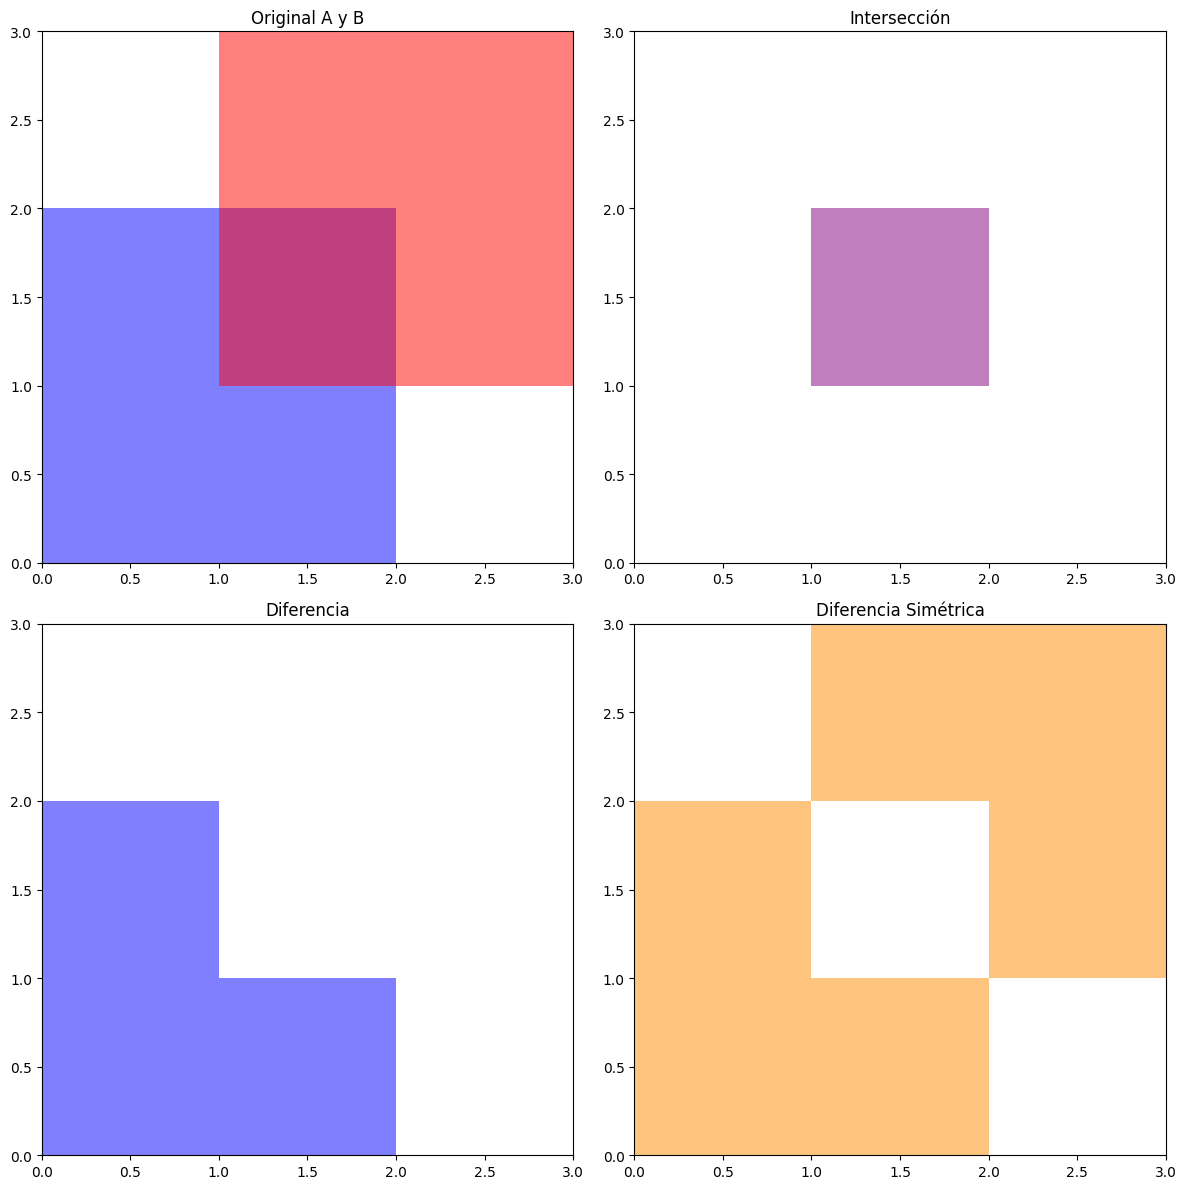

In [9]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# Intersecci√≥n
intersecado = gpd.overlay(df1=A, df2=B, how="intersection")
print("Intersecci√≥n:")
print(intersecado)

# Diferencia
diferencia = gpd.overlay(df1=A, df2=B, how="difference")
print("Diferencia:")
print(diferencia)

# Diferencia Sim√©trica
diferencia_simetrica = gpd.overlay(df1=A, df2=B, how="symmetric_difference")
print("Diferencia Sim√©trica:")
print(diferencia_simetrica)

# Visualizar los resultados
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Obtener los l√≠mites combinados
xmin = min(A.total_bounds[0], B.total_bounds[0])
xmax = max(A.total_bounds[2], B.total_bounds[2])
ymin = min(A.total_bounds[1], B.total_bounds[1])
ymax = max(A.total_bounds[3], B.total_bounds[3])

# Establecer los mismos l√≠mites para todos los subplots
for ax in axes.flat:
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# Original A y B
A.plot(ax=axes[0, 0], color="blue", alpha=0.5)
B.plot(ax=axes[0, 0], color="red", alpha=0.5)
axes[0, 0].set_title("Original A y B")

# Intersecci√≥n
intersecado.plot(ax=axes[0, 1], color="purple", alpha=0.5)
axes[0, 1].set_title("Intersecci√≥n")

# Diferencia
diferencia.plot(ax=axes[1, 0], color="blue", alpha=0.5)
axes[1, 0].set_title("Diferencia")

# Diferencia Sim√©trica
diferencia_simetrica.plot(ax=axes[1, 1], color="darkorange", alpha=0.5)
axes[1, 1].set_title("Diferencia Sim√©trica")

plt.tight_layout()
plt.show()

# <font color="#229966">Ejercicio 1</font>

Con los tri√°ngulos definidos a continuaci√≥n (u otros que te gusten a vos!) realizar la uni√≥n y la intersecci√≥n y mostrarlos!

<Axes: >

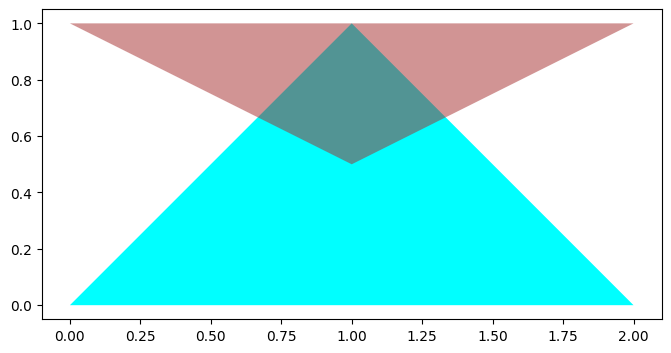

In [10]:
from shapely.geometry import Polygon, Point, LineString

polys1 = gpd.GeoSeries([Polygon([(0, 0), (2, 0), (1, 1)])])

polys2 = gpd.GeoSeries([Polygon([(0, 1), (2, 1), (1, 0.5)])])


A = gpd.GeoDataFrame({"geometry": polys1, "letra": ["T1"]})
B = gpd.GeoDataFrame({"geometry": polys2, "letra": ["T2"]})

f, ax = plt.subplots(1, figsize=(8, 8))
A.plot(ax=ax, color="cyan")
B.plot(ax=ax, color="brown", alpha=0.5)

# <font color="#229966">Datos Reales</font>

In [11]:
# seleccionar columnas de interes, cambiarle los nombres y el formato
com = com.reindex(
    columns=["COMUNAS", "AREA", "geometry"]
)  # reorganizamos las columnas comunas area y geometry en un nuevo dataframe
com.columns = ["COMUNA", "AREA_COMUNA", "geometry"]  # renombramos las columnas a gusto
com.COMUNA = com.COMUNA.map(
    lambda x: str(int(x))
)  # convierte los nombres de las comunas en string
com.head(2)


COMUNA   AREA_COMUNA                                           geometry
0      2  6.140873e+06  POLYGON ((106248.322 106329.927, 106283.690 10...
1      5  6.660526e+06  POLYGON ((104625.143 101679.935, 104629.994 10...

In [12]:
# Buscamos los datos de promedio ponderado de NBI por comuna
nbi = pd.read_csv(DATA_PATH / "nbi_x_comuna.csv")

nbi = nbi.reset_index()
nbi = nbi.rename(columns={"index": "COMUNA"})
nbi.COMUNA = nbi.COMUNA.map(str)
nbi.columns = ["COMUNA", "NBI_prom"]
nbi.head()

COMUNA   NBI_prom
0      0  15.119460
1      1   4.547143
2      2   2.648427
3      3   2.350097
4      4   3.320962

In [13]:
# pasamos los datos a la cartograf√≠a de las comunas y chequear si hay datos faltantes
com = com.merge(nbi, on="COMUNA", how="inner")
com

COMUNA   AREA_COMUNA                                           geometry  \
0       2  6.140873e+06  POLYGON ((106248.322 106329.927, 106283.690 10...   
1       5  6.660526e+06  POLYGON ((104625.143 101679.935, 104629.994 10...   
2       6  6.851029e+06  POLYGON ((102998.760 102464.802, 103002.947 10...   
3       7  1.242290e+07  POLYGON ((101036.604 99947.208, 101075.002 998...   
4       9  1.650531e+07  POLYGON ((94869.346 99583.645, 94885.072 99583...   
5      10  1.265656e+07  POLYGON ((97703.854 101010.270, 97716.104 1009...   
6      11  1.412004e+07  POLYGON ((96781.486 103649.395, 96892.479 1035...   
7      12  1.557093e+07  POLYGON ((96329.447 103927.833, 96314.729 1039...   
8      14  1.577250e+07  POLYGON ((103353.744 108568.622, 103353.843 10...   
9       3  6.385991e+06  POLYGON ((104713.283 103467.380, 104862.315 10...   
10      8  2.219261e+07  POLYGON ((101298.828 97570.934, 101326.690 975...   
11      4  2.170124e+07  POLYGON ((109913.660 101086.258, 109919.211 10...   
12      1  1.780281e+07  MULTIPOLYGON (((108694.994 106166.075, 108697....   
13     13  1.457181e+07  POLYGON ((100611.996 111283.158, 100620.875 11...   

     NBI_prom  
0    2.648427  
1    4.177565  
2    5.408870  
3    5.930856  
4   13.503061  
5    6.370736  
6    3.014483  
7   10.872825  
8    4.575194  
9    2.350097  
10  11.106049  
11   3.320962  
12   4.547143  
13  11.567969

In [14]:
# seleccionar y renombrar columnas de los distritos escolares
dis = dis.reindex(columns=["ROMANO", "AREA", "geometry"])
dis.columns = ["DISTRITO", "AREA_DISTRITO", "geometry"]
dis.head()

DISTRITO  AREA_DISTRITO                                           geometry
0       II   6.527968e+06  POLYGON ((105611.166 102698.177, 105618.690 10...
1      III   4.927409e+06  POLYGON ((108108.830 102223.802, 108111.635 10...
2       VI   6.722145e+06  POLYGON ((105708.729 101262.958, 105715.307 10...
3      VII   7.237555e+06  POLYGON ((102410.091 102749.997, 102407.548 10...
4     VIII   6.311372e+06  POLYGON ((101903.255 98390.064, 101900.588 983...

In [15]:
# chequeamos que los geodataframes tengan el mismo sistema de coordenadas

print(
    "los geoDataFrame tienen el mismo sistema de coordenadas?\n Respuesta:",
    com.crs == dis.crs,
)

los geoDataFrame tienen el mismo sistema de coordenadas?
 Respuesta: True


In [16]:
# realizamos la union y observamos los datos

unidas = gpd.overlay(com, dis, how="union")
unidas.head(15)

COMUNA   AREA_COMUNA  NBI_prom DISTRITO  AREA_DISTRITO  \
0       2  6.140873e+06  2.648427       II   6.527968e+06   
1       2  6.140873e+06  2.648427       IX   1.703833e+07   
2       2  6.140873e+06  2.648427        I   1.453768e+07   
3       5  6.660526e+06  4.177565       II   6.527968e+06   
4       5  6.660526e+06  4.177565       VI   6.722145e+06   
5       5  6.660526e+06  4.177565      VII   7.237555e+06   
6       5  6.660526e+06  4.177565     VIII   6.311372e+06   
7       5  6.660526e+06  4.177565        V   1.133738e+07   
8       5  6.660526e+06  4.177565      XIX   9.409782e+06   
9       6  6.851029e+06  5.408870       II   6.527968e+06   
10      6  6.851029e+06  5.408870      VII   7.237555e+06   
11      6  6.851029e+06  5.408870     VIII   6.311372e+06   
12      7  1.242290e+07  5.930856      VII   7.237555e+06   
13      7  1.242290e+07  5.930856     VIII   6.311372e+06   
14      7  1.242290e+07  5.930856       XI   7.113102e+06   

                                             geometry  
0   MULTIPOLYGON (((105523.783 103378.966, 105573....  
1   MULTIPOLYGON (((105587.274 106140.404, 105622....  
2   POLYGON ((106283.690 106316.731, 106329.275 10...  
3   POLYGON ((102914.111 102698.153, 102840.705 10...  
4   POLYGON ((104629.994 101532.700, 104635.643 10...  
5   POLYGON ((103122.596 101570.794, 103051.408 10...  
6   POLYGON ((103758.572 98810.145, 103649.838 987...  
7   MULTIPOLYGON (((104324.354 98925.442, 104328.5...  
8   MULTIPOLYGON (((104078.296 98876.928, 104096.3...  
9   POLYGON ((102396.330 102741.645, 102407.082 10...  
10  POLYGON ((103002.947 102386.419, 103003.901 10...  
11  POLYGON ((103122.596 101570.794, 103125.658 10...  
12  POLYGON ((100241.424 101655.349, 100266.549 10...  
13  POLYGON ((101173.893 99865.630, 101278.338 998...  
14  POLYGON ((101075.002 99848.067, 101118.611 997...

**Notemos que algunas de las geometr√≠as son polygon y otras son myltipolygon**


**Polygon**: Representa una √∫nica √°rea cerrada con uno o m√°s anillos (un anillo exterior y opcionalmente uno o m√°s anillos interiores).


**MultiPolygon** Representa una colecci√≥n de varios pol√≠gonos que pueden estar disjuntos.

## <font color="#229966">Caso ejemplo</font>
En el cuadro de arriba podemos ver por ejemplo que el Distrito XIII comparte territorio con 4 Comunas: 7,8,9,10. Veamos otro caso particular como el caso 6.

<Axes: >

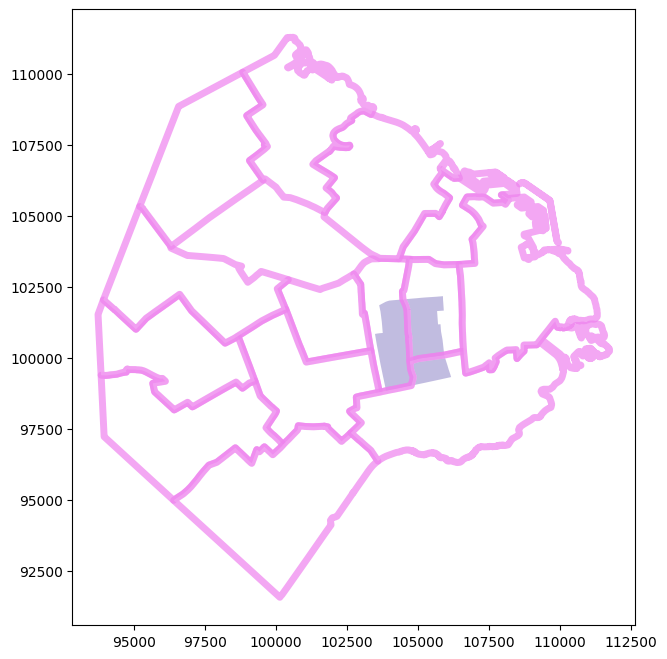

In [17]:
# tomemos un caso de ejemplo el distrito escolar 6
fig, ax = plt.subplots(1, figsize=(8, 8))
dis.loc[dis.DISTRITO == "VI"].plot(ax=ax, facecolor="#332299", alpha=1)
com.plot(ax=ax, facecolor="white", edgecolor="violet", alpha=0.7, linewidth=5)

In [18]:
# creamos un geodataframe del distrito 6
distrito6 = unidas.loc[unidas.DISTRITO == "VI", :].copy()
distrito6

COMUNA   AREA_COMUNA  NBI_prom DISTRITO  AREA_DISTRITO  \
4       5  6.660526e+06  4.177565       VI   6.722145e+06   
42      3  6.385991e+06  2.350097       VI   6.722145e+06   
50      4  2.170124e+07  3.320962       VI   6.722145e+06   

                                             geometry  
4   POLYGON ((104629.994 101532.700, 104635.643 10...  
42  POLYGON ((105829.260 100079.184, 105813.088 10...  
50  MULTIPOLYGON (((104795.135 99110.044, 104802.0...


Observamos que se superpone con las comunas 5, 3 y 4. Vemos atributos de los datasets originales, como el area del distrito y el area de la comuna. Tambi√©n hay una parte del distrito que no se superpone con ninguna comuna. 

In [19]:
# calculamos el area de las unidades espaciales obtenidas
distrito6["area_union"] = distrito6.geometry.area
distrito6

COMUNA   AREA_COMUNA  NBI_prom DISTRITO  AREA_DISTRITO  \
4       5  6.660526e+06  4.177565       VI   6.722145e+06   
42      3  6.385991e+06  2.350097       VI   6.722145e+06   
50      4  2.170124e+07  3.320962       VI   6.722145e+06   

                                             geometry    area_union  
4   POLYGON ((104629.994 101532.700, 104635.643 10...  3.101152e+06  
42  POLYGON ((105829.260 100079.184, 105813.088 10...  2.521101e+06  
50  MULTIPOLYGON (((104795.135 99110.044, 104802.0...  1.099892e+06

In [20]:
# Definimos los pesos o ponderadores como la proporci√≥n del area de las nuevas unidades espaciales
# en realci√≥n al area de la unidad de inter√©s, del area a donde queremos llevar los datos, es decir los distritos

distrito6["peso"] = distrito6.area_union / distrito6.AREA_DISTRITO
distrito6.head()

COMUNA   AREA_COMUNA  NBI_prom DISTRITO  AREA_DISTRITO  \
4       5  6.660526e+06  4.177565       VI   6.722145e+06   
42      3  6.385991e+06  2.350097       VI   6.722145e+06   
50      4  2.170124e+07  3.320962       VI   6.722145e+06   

                                             geometry    area_union      peso  
4   POLYGON ((104629.994 101532.700, 104635.643 10...  3.101152e+06  0.461334  
42  POLYGON ((105829.260 100079.184, 105813.088 10...  2.521101e+06  0.375044  
50  MULTIPOLYGON (((104795.135 99110.044, 104802.0...  1.099892e+06  0.163622

In [21]:
# Sumamos los pesos
distrito6.peso.sum()

1.0000000000000555

In [22]:
# Vamos a obtener un NBI del distrito ponderando por el area que comparte dicho distrito con cada una de las comunas
sum(distrito6.NBI_prom * distrito6.peso)

3.3520247979672977

## <font color="#229966">Realizamos la aplicaci√≥n a todos los distritos</font>

In [23]:
# calcular el area de todas las unidades nuevas
unidas["area_union"] = unidas.geometry.area
# calcular los pesos
unidas["peso"] = unidas.area_union / unidas.AREA_DISTRITO

unidas.head(20)

COMUNA   AREA_COMUNA   NBI_prom DISTRITO  AREA_DISTRITO  \
0       2  6.140873e+06   2.648427       II   6.527968e+06   
1       2  6.140873e+06   2.648427       IX   1.703833e+07   
2       2  6.140873e+06   2.648427        I   1.453768e+07   
3       5  6.660526e+06   4.177565       II   6.527968e+06   
4       5  6.660526e+06   4.177565       VI   6.722145e+06   
5       5  6.660526e+06   4.177565      VII   7.237555e+06   
6       5  6.660526e+06   4.177565     VIII   6.311372e+06   
7       5  6.660526e+06   4.177565        V   1.133738e+07   
8       5  6.660526e+06   4.177565      XIX   9.409782e+06   
9       6  6.851029e+06   5.408870       II   6.527968e+06   
10      6  6.851029e+06   5.408870      VII   7.237555e+06   
11      6  6.851029e+06   5.408870     VIII   6.311372e+06   
12      7  1.242290e+07   5.930856      VII   7.237555e+06   
13      7  1.242290e+07   5.930856     VIII   6.311372e+06   
14      7  1.242290e+07   5.930856       XI   7.113102e+06   
15      7  1.242290e+07   5.930856      XII   6.364602e+06   
16      7  1.242290e+07   5.930856     XIII   1.054987e+07   
17      7  1.242290e+07   5.930856      XIX   9.409782e+06   
18      9  1.650531e+07  13.503061       XI   7.113102e+06   
19      9  1.650531e+07  13.503061     XIII   1.054987e+07   

                                             geometry    area_union  \
0   MULTIPOLYGON (((105523.783 103378.966, 105573....  1.061262e+06   
1   MULTIPOLYGON (((105587.274 106140.404, 105622....  1.295425e+03   
2   POLYGON ((106283.690 106316.731, 106329.275 10...  5.078315e+06   
3   POLYGON ((102914.111 102698.153, 102840.705 10...  2.080945e+06   
4   POLYGON ((104629.994 101532.700, 104635.643 10...  3.101152e+06   
5   POLYGON ((103122.596 101570.794, 103051.408 10...  4.983742e+05   
6   POLYGON ((103758.572 98810.145, 103649.838 987...  9.800558e+05   
7   MULTIPOLYGON (((104324.354 98925.442, 104328.5...  2.307600e-07   
8   MULTIPOLYGON (((104078.296 98876.928, 104096.3...  8.593171e-04   
9   POLYGON ((102396.330 102741.645, 102407.082 10...  1.337798e+05   
10  POLYGON ((103002.947 102386.419, 103003.901 10...  4.446139e+06   
11  POLYGON ((103122.596 101570.794, 103125.658 10...  2.271110e+06   
12  POLYGON ((100241.424 101655.349, 100266.549 10...  3.071909e+05   
13  POLYGON ((101173.893 99865.630, 101278.338 998...  3.060206e+06   
14  POLYGON ((101075.002 99848.067, 101118.611 997...  5.205315e+06   
15  POLYGON ((99009.330 99870.341, 99004.079 99884...  2.201485e+06   
16  POLYGON ((100265.669 96945.270, 100264.751 969...  8.496290e-03   
17  POLYGON ((102841.627 98554.520, 102846.494 984...  1.648704e+06   
18  POLYGON ((98308.775 98980.419, 98334.572 98994...  1.240799e+06   
19  POLYGON ((96116.338 98452.153, 96225.400 98352...  7.095148e+06   

            peso  
0   1.625717e-01  
1   7.603004e-05  
2   3.493209e-01  
3   3.187737e-01  
4   4.613336e-01  
5   6.885947e-02  
6   1.552841e-01  
7   2.035390e-14  
8   9.132168e-11  
9   2.049332e-02  
10  6.143150e-01  
11  3.598441e-01  
12  4.244402e-02  
13  4.848717e-01  
14  7.317925e-01  
15  3.458952e-01  
16  8.053453e-10  
17  1.752117e-01  
18  1.744385e-01  
19  6.725340e-01

In [24]:
# explorar los pesos de las areas que no tienen comuna: todos son muy peque√±os cercanos a 0
unidas.loc[(unidas.COMUNA.isnull()), "peso"].describe()

count    1.400000e+01
mean     1.061374e-01
std      2.267187e-01
min      1.512314e-14
25%      5.718878e-12
50%      1.494528e-02
75%      1.012051e-01
max      8.619307e-01
Name: peso, dtype: float64

In [25]:
unidas["valor_ponderado"] = unidas.NBI_prom * unidas.peso
unidas.head()

COMUNA   AREA_COMUNA  NBI_prom DISTRITO  AREA_DISTRITO  \
0      2  6.140873e+06  2.648427       II   6.527968e+06   
1      2  6.140873e+06  2.648427       IX   1.703833e+07   
2      2  6.140873e+06  2.648427        I   1.453768e+07   
3      5  6.660526e+06  4.177565       II   6.527968e+06   
4      5  6.660526e+06  4.177565       VI   6.722145e+06   

                                            geometry    area_union      peso  \
0  MULTIPOLYGON (((105523.783 103378.966, 105573....  1.061262e+06  0.162572   
1  MULTIPOLYGON (((105587.274 106140.404, 105622....  1.295425e+03  0.000076   
2  POLYGON ((106283.690 106316.731, 106329.275 10...  5.078315e+06  0.349321   
3  POLYGON ((102914.111 102698.153, 102840.705 10...  2.080945e+06  0.318774   
4  POLYGON ((104629.994 101532.700, 104635.643 10...  3.101152e+06  0.461334   

   valor_ponderado  
0         0.430559  
1         0.000201  
2         0.925151  
3         1.331698  
4         1.927251

In [26]:
sal = unidas.reindex(columns=["DISTRITO", "valor_ponderado"]).groupby("DISTRITO").sum()
sal


valor_ponderado
DISTRITO                 
I                3.736840
II               3.339893
III              3.859840
IV               3.931385
IX               5.234799
V                3.386405
VI               3.352025
VII              4.055015
VIII             5.470764
X               11.325089
XI               7.292987
XII              4.713736
XIII            12.049496
XIV              0.671142
XIX              7.631165
XV               9.573213
XVI              7.516145
XVII             3.481198
XVIII            7.275693
XX              12.961664
XXI             11.106049

Text(0.5, 1.0, 'NBI por Distrito escolar')

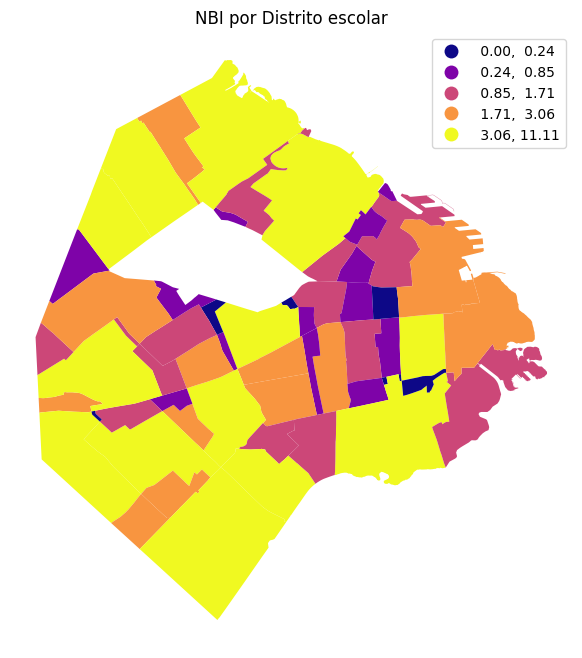

In [27]:
# Vamos a visualizar
f, ax = plt.subplots(1, figsize=(8, 8))
unidas.plot(
    ax=ax, column="valor_ponderado", legend=True, scheme="Quantiles", k=5, cmap="plasma"
)
ax.set_axis_off()
ax.set_title("NBI por Distrito escolar")


# Analizando poblacion que vive cerca de una estacion de subte

Vamos a realizar un caso de overlay tradicional mediante un join espacial utilizando la funci√≥n de GeoPandas sjoin(). El caso tradicional de uso es cuando queremos transferir informaci√≥n de una serie de objetos referenciados en el espacio a otros, utilizando como criterio su relaci√≥n en el espacio.

In [28]:
# cargamos nuestros shapes y proyectamos en la misma crs
carto = gpd.read_file(DATA_PATH / "census/informacion_censal_por_radio_2010.shp")
carto = carto.to_crs(epsg=5347)

estaciones = gpd.read_file(DATA_PATH / "subte/estaciones_de_subte.shp")
estaciones = estaciones.to_crs(epsg=5347)

In [29]:
# transformamos nuestro shape de estaciones de puntos en poligonos, de 500m a la redonda,
# considerando eso como el area de influencia de la estacion
estaciones_b = estaciones.copy()
estaciones_b.geometry = estaciones_b.buffer(500)

<Axes: >

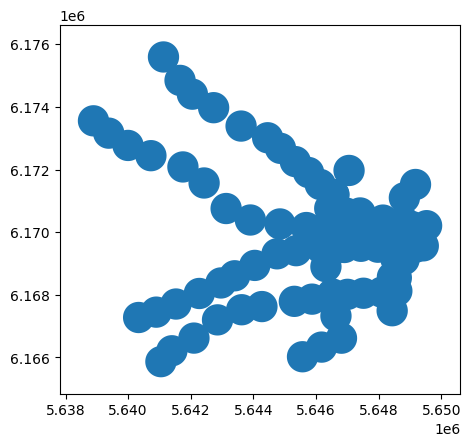

In [30]:
estaciones_b.plot()

In [31]:
# Crear el gr√°fico
fig, ax = plt.subplots(figsize=(10, 10))

# Dibujar la capa de la ciudad de Buenos Aires
carto.plot(ax=ax, color="lightgrey", edgecolor="black")

# Dibujar la capa de las estaciones de subte
estaciones_b.plot(
    ax=ax, color="#229966", markersize=10, label="Estaciones de Subte", alpha=0.5
)

# Ajustar los l√≠mites del gr√°fico para asegurarse de que ambas capas sean visibles
xmin, ymin, xmax, ymax = carto.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Agregar t√≠tulo y leyenda
ax.set_title("Ciudad de Buenos Aires con Estaciones de Subte")
ax.legend()

# Mostrar el gr√°fico
plt.show()

In [32]:
# realizamos un join espacial, manteniendo todos los radios y obteniendo solo la informacion de los
# radios CONTENIDOS en dicha area de influencia
left_within = gpd.sjoin(carto, estaciones_b, how="left", op="within")
left_within.ESTACION = left_within.ESTACION.fillna("Ninguna")
left_within.head()
left_within = left_within.dropna()

<Axes: >

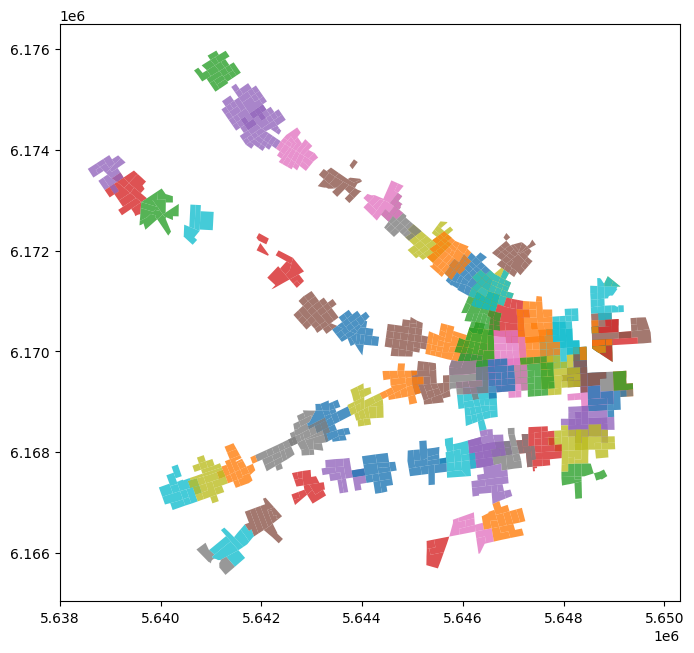

In [33]:
# ploteamos los resultados
f, ax = plt.subplots(1, figsize=(8, 8))
left_within.plot(ax=ax, column="ESTACION", alpha=0.8)

<Axes: >

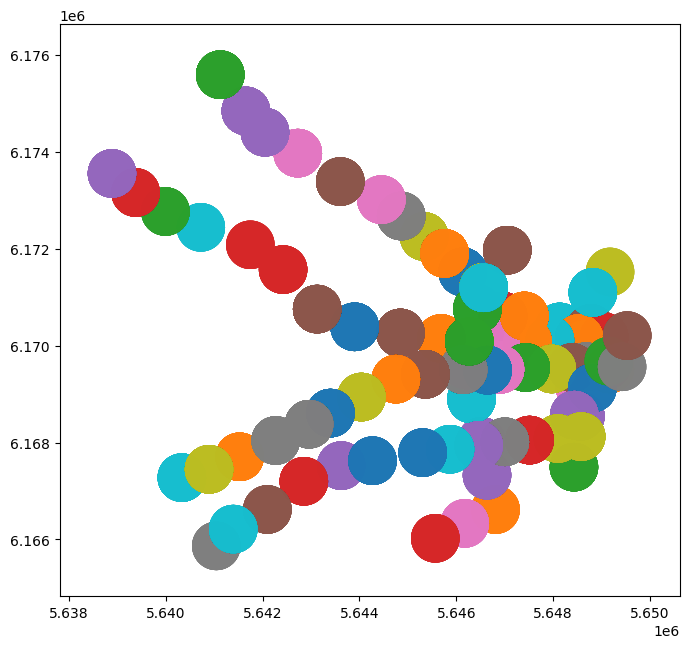

In [34]:
# realizmamos lo opuesto, manteniendo todas las estaciones y
right_intersects = gpd.sjoin(carto, estaciones_b, how="right", op="intersects")
right_intersects.ESTACION = right_intersects.ESTACION.fillna("Ninguna")

f, ax = plt.subplots(1, figsize=(8, 8))
right_intersects.plot(ax=ax, column="ESTACION", alpha=0.4)

In [35]:
# finalmente usamos la opcion por defecto, donde solo se mantienen los darios que intersectan
# con algun area de influencia estacion
radios_est = gpd.sjoin(carto, estaciones_b, how="inner", op="intersects")


In [36]:
f, ax = plt.subplots(1, figsize=(8, 8))
radios_est.plot(ax=ax, column="ESTACION", alpha=0.4)

<Axes: >

El inconveniente con este abordaje, es que un radio puede estar dentro del √°rea de influencia de mas de una estaci√≥n. Por ejemplo los radios del nudo del Obelisco

In [37]:
#chequeamos cuantos radios estan duplicados
radios_est.RADIO_I.duplicated().sum()

1659

In [38]:
# veamos un ejemplo
radios_est.loc[radios_est.RADIO_I == "1_12_1", ["RADIO_I", "ESTACION", "LINEA"]]

RADIO_I                   ESTACION LINEA
1  1_12_1                 SAENZ PE√ëA     A
1  1_12_1                       LIMA     A
1  1_12_1             DIAGONAL NORTE     C
1  1_12_1                 9 DE JULIO     D
1  1_12_1                    URUGUAY     B
1  1_12_1              C. PELLEGRINI     B
1  1_12_1  TRIBUNALES - TEATRO COL√ìN     D

# <font color="darkmagenta">Regresi√≥n lineal Simple</font>

Dentro de los supervisados se encuentra la regresi√≥n lineal, que es una herramienta √∫til para predecir una respuesta cuantitativa.

Existen muchos algoritmos posteriores que pueden ser vistos como una generalizaci√≥n o una extensi√≥n de las regresiones lineales, por ello es importante tener un conocimiento real de este algoritmo, aunque pueda parecer simple.

En sentido amplio lo que hace una regresi√≥n lineal es obtener la relaci√≥n entre unas variables independientes (X) y una variable dependiente (Y). Es decir, teniendo una serie de variables predictoras obtiene la relaci√≥n con una variable cuantitativa a predecir. La regresi√≥n lineal explica la variable Y con las variables X, y obtiene la funci√≥n lineal que mejor se ajusta o explica esta relaci√≥n.

Cuando hay una sola variable predictora decimos que es una regresi√≥n lineal simple.

Cuando hay m√°s de una variable predictora decimos que la regresi√≥n es m√∫ltiple.

Es decir, Y es funci√≥n lineal de X, m√°s un t√©rmino de error. La parte
es el modelo de regresi√≥n lineal, siendo y los coeficientes de la regresi√≥n lineal y

el error cometido por el modelo.

Estos dos coeficientes son dos constantes que se obtienen por medio de lo que se denomina ¬´entrenamiento¬ª del modelo de regresi√≥n. Este entrenamiento se realiza con datos de los que sabemos valores reales de la tupla (X,y)

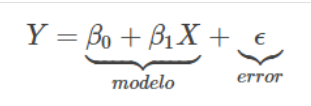

Una vez obtenida la estimaci√≥n de estos dos coeficientes se puede predecir la variable Y usando X conocidos y a partir de la siguiente f√≥rmula:

El m√©todo empleado con m√°s frecuencia es el ajuste por m√≠nimos cuadrados ordinarios (OLS), que identifica como mejor modelo la recta (o plano si es regresi√≥n m√∫ltiple) que minimiza la suma de las desviaciones verticales entre cada dato de entrenamiento y la recta, elevadas al cuadrado.


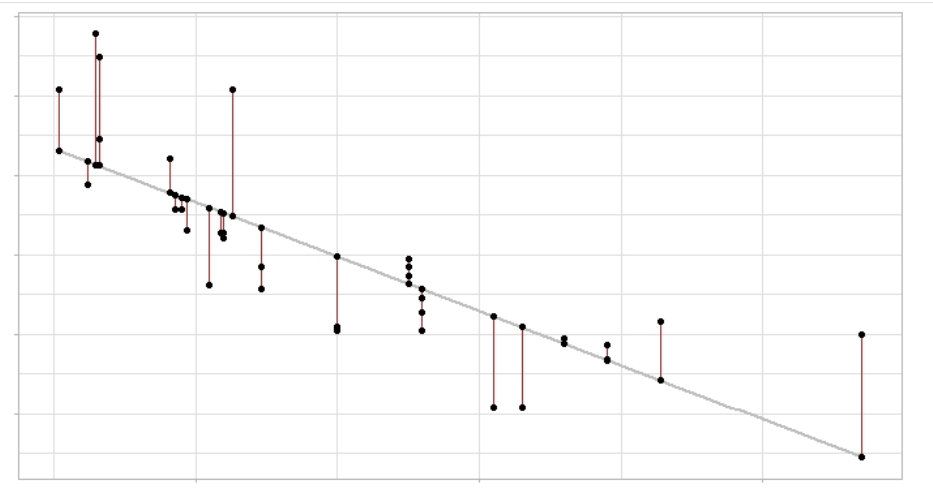

## <font color="#225577">Ejemplo 1 de regresi√≥n lineal simple</font>

Los datos a usar en este tutorial corresponden a la medici√≥n de la presi√≥n sangu√≠nea sist√≥lica (medida en mm de Mercurio) para 29 sujetos de diferentes edades.

En este set de datos la variable independiente (x) corresponde a la edad de cada sujeto, mientras que la variable dependiente (y) es precisamente la presi√≥n sangu√≠nea.

A continuaci√≥n leemos y visualizamos los datos.


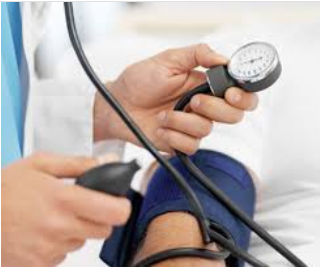

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

pres = pd.read_csv(DATA_PATH / "health/presion.csv", sep=";")
pres


Edad  Pres_sist
0     39        144
1     45        138
2     47        145
3     65        162
4     46        142
5     67        170
6     42        124
7     67        158
8     56        154
9     64        162
10    56        150
11    59        140
12    34        110
13    42        128
14    48        130
15    45        135
16    17        114
17    20        116
18    19        124
19    36        136
20    50        142
21    39        120
22    21        120
23    44        160
24    53        158
25    63        144
26    29        130
27    25        125
28    69        175

La figura de abajo muestra la relaci√≥n entre estas dos variables, evidenciando que los datos tienen un comportamiento lineal. Sin embargo podemos testear estad√≠sticamente si las variables est√°n o no asociadas linealmente.

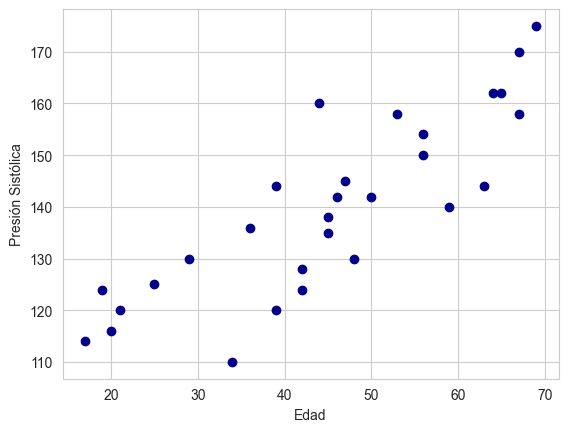

In [40]:
import seaborn as sns

# Establecer el estilo y el esquema de colores
sns.set_style("whitegrid")  # Establecer el estilo del fondo

plt.scatter(pres["Edad"], pres["Pres_sist"], color="darkblue")
plt.xlabel("Edad")
plt.ylabel("Presi√≥n Sist√≥lica")

plt.show()

In [41]:
# Testeamos la correlaci√≥n lineal entre las dos variables

corr_test = pearsonr(x=pres["Edad"], y=pres["Pres_sist"])
p_valor = corr_test[1]

# Formateamos  el p-valor en notaci√≥n cient√≠fica con 5 decimales
p_valor_formatted = "{:.5e}".format(p_valor)

# Guardamos el valor de la correlaci√≥n estimada
coef_corr = corr_test[0].round(3)

print("Coeficiente de correlaci√≥n de Pearson: ", coef_corr.round(3))
print("P-value: ", p_valor_formatted)

Coeficiente de correlaci√≥n de Pearson:  0.844
P-value:  8.87628e-09


<font color="#5588AA">**Dado que las variables est√°n correlacionadas, tiene sentido ajustar una recta de regresi√≥n para explicar la relaci√≥n entre las mismas.**</font >

In [42]:
presx = pres["Edad"].values.reshape(
    -1, 1
)  # Necesario para que sklearn pueda trabajar con los datos
y = pres["Pres_sist"].values

# Crear el modelo de regresi√≥n lineal
modeloLS = LinearRegression()

# Ajustar el modelo a los datos
modeloLS.fit(presx, y)

# Predecir los valores de presi√≥n sist√≥lica basados en la edad
y_pred = modeloLS.predict(presx)

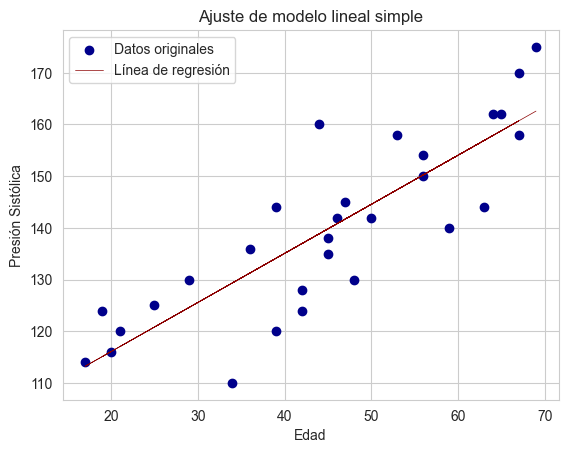

In [43]:
# Visualicemos  los datos originales y la l√≠nea de regresi√≥n
plt.scatter(presx, y, color="darkblue", label="Datos originales")
plt.plot(presx, y_pred, color="darkred", linewidth=0.5, label="L√≠nea de regresi√≥n")
plt.xlabel("Edad")
plt.ylabel("Presi√≥n Sist√≥lica")
plt.title("Ajuste de modelo lineal simple")
plt.legend()
plt.show()

<font color="#224411">**Pero, ¬øcu√°les son los coeficientes estimados de esta regresi√≥n?**</font>

In [44]:
# Coeficientes de la regresi√≥n
pendiente = modeloLS.coef_

pendiente.round(3)

array([0.949])

In [45]:
ordenada_origen = modeloLS.intercept_
ordenada_origen.round(3)

97.077

In [46]:
print(
    "La ecuaci√≥n de la recta ajustada es y^=",
    ordenada_origen.round(3),
    "+",
    pendiente.round(3),
    "x",
)

La ecuaci√≥n de la recta ajustada es y^= 97.077 + [0.949] x


Ahora que conocemos los coeficientes, agreguemos al gr√°fico la expresi√≥n de la recta de regresi√≥n ajustada.


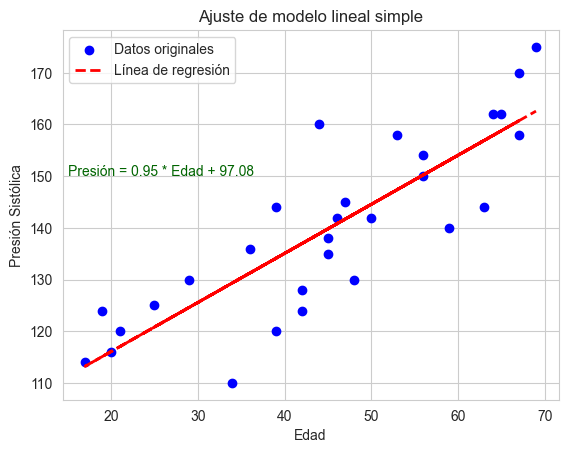

In [47]:
# Plotear los datos originales y la l√≠nea de regresi√≥n punteada
plt.scatter(presx, y, color="blue", label="Datos originales")
plt.plot(
    presx,
    y_pred,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label="L√≠nea de regresi√≥n",
)
plt.xlabel("Edad")
plt.ylabel("Presi√≥n Sist√≥lica")
plt.title("Ajuste de modelo lineal simple")

# Superponer la ecuaci√≥n estimada para la regresi√≥n
plt.text(
    15,
    150,
    f"Presi√≥n = {pendiente[0]:.2f} * Edad + {ordenada_origen:.2f}",
    color="darkgreen",
)

plt.legend()
plt.show()


## <font color="#775599">Error Estandar Residual (RSE)</font>

La calidad del ajuste de la regresi√≥n lineal t√≠picamente es evaluada usando dos medidas: el **RSE** (error est√°ndar de los residuos o residual standard error) y el estad√≠stico R cuadrado.

El RSE es una estimaci√≥n de la desviaci√≥n est√°ndar del error $\epsilon$.
En otras palabras, es la cantidad media que la respuesta se desviar√° de la recta real de regresi√≥n. Se obtiene con la siguiente f√≥rmula:


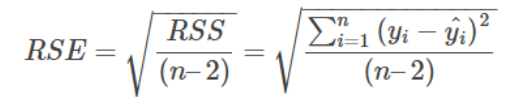


Su valor puede ser bueno o malo dependiendo del contexto ya que no es adimensional.

In [48]:
# Calculamos los residuos correspondientes al modelo ajustado
residuos = y - y_pred

# Calculanos el error est√°ndar de los residuos (RSE)
rse = np.sqrt(np.sum(residuos**2) / (len(y) - 2))

print("Error est√°ndar de los residuos (RSE): ", rse.round(3))


Error est√°ndar de los residuos (RSE):  9.563


## <font color="#775599">Coeficiente de Determinaci√≥n del Modelo</font>

El **$R^2$** o coeficiente de determinaci√≥n, sin embargo toma valores entre 0 y 1, representa la proporci√≥n de la varianza explicada y es independiente de la escala de Y.

Para calcular el valor de **$R^2$** se usa la siguiente f√≥rmula:





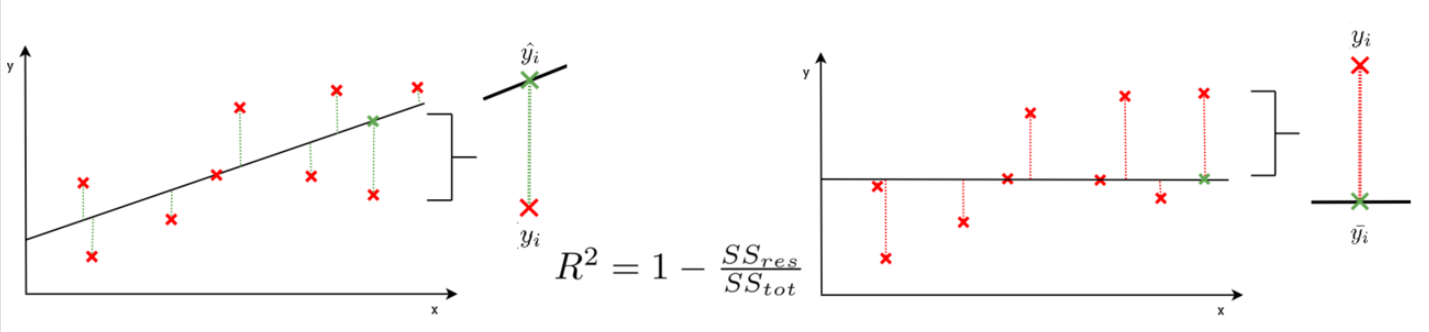

En esta gr√°fica se aprecian dos tipos de error, el que se comete estimando la Y con su promedio $\overline{Y}$

y el que se comete estimando la Y a partir de la recta de regresi√≥n.

El coeficiente de determinaci√≥n **$R^2$** compara la suma de cuadrados de estos dos errores.

Si al usar la recta el error es mucho menor que sin usarla ser√° cercano a 1 y esto indicar√° que la recta es una buena opci√≥n para estimar Y.

Si en cambio  **$R^2$** es cercano a 0, significa que la variable X no contribuye sustancialmente a la estimaci√≥n de la Y.

In [49]:
modeloLS.score(presx, y)

0.71217886464055

In [50]:
# Calcular el coeficiente de determinaci√≥n R^2
r_cuadrado = modeloLS.score(presx, y)
print(f"Coeficiente de determinaci√≥n , R^2: {r_cuadrado:.4f}")

Coeficiente de determinaci√≥n , R^2: 0.7122


## <font color="#225577">Ejemplo 2 de regresi√≥n lineal simple</font>

Sup√≥ngase que un analista de deportes quiere saber si existe una relaci√≥n entre el n√∫mero de veces que patean al arco los jugadores de un equipo de futbol y el n√∫mero de goles que consigue el equipo. En caso de existir y de establecer un modelo, podr√≠a predecir el resultado del partido?


Vamos a clasificar ahora las bibliotecas en funci√≥n de su utilidad

In [51]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gr√°ficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import linregress
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



Configuramos los par√°metros gr√°ficos y alertas

In [52]:
# Configuraci√≥n matplotlib
# ==============================================================================

style.use("ggplot") or plt.style.use("ggplot")

In [53]:
# Cargamos los datos

# Datos
# ==============================================================================
equipos = [
    "Indep",
    "Huracan",
    "Estudiantes",
    "River",
    "Boca",
    "Newls.",
    "Lanus",
    "SanLorenzo",
    "Pe√±arol",
    "Colocolo",
    "Racing",
    "Platense",
    "Chicago",
    "Fluminense",
    "Patronato",
    "Banfield",
    "Defensores",
    "ArgJun",
    "Ferro",
    "Gimnasia",
    "Talleres",
    "Tigre",
    "Velez",
    "Union",
    "SanMiguel",
    "Atlanta",
    "Instituto",
    "Quilmes",
    "Chacarita",
    "AllBoys",
]
patea = [
    5659,
    5710,
    5563,
    5672,
    5532,
    5600,
    5518,
    5447,
    5544,
    5598,
    5585,
    5436,
    5549,
    5612,
    5513,
    5579,
    5502,
    5509,
    5421,
    5559,
    5487,
    5508,
    5421,
    5452,
    5436,
    5528,
    5441,
    5486,
    5417,
    5421,
]

goles = [
    855,
    825,
    757,
    830,
    762,
    748,
    767,
    721,
    735,
    685,
    708,
    644,
    654,
    735,
    667,
    713,
    654,
    704,
    681,
    743,
    619,
    625,
    610,
    645,
    677,
    641,
    624,
    570,
    593,
    556,
]

futbol = pd.DataFrame({"equipos": equipos, "patea": patea, "goles": goles})
futbol.head(5)


equipos  patea  goles
0        Indep   5659    855
1      Huracan   5710    825
2  Estudiantes   5563    757
3        River   5672    830
4         Boca   5532    762

Vamos a representar los datos para poder intuir si existe una relaci√≥n y cuantificar dicha relaci√≥n mediante un coeficiente de correlaci√≥n.


Text(0.5, 1.0, 'Distribuci√≥n de patea y goles')

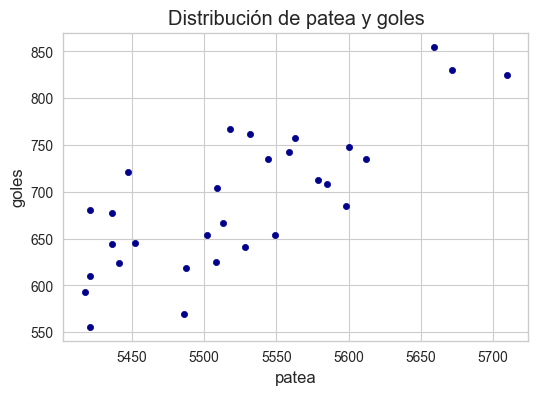

In [54]:
# Gr√°fico
# ==============================================================================
sns.set_style("whitegrid")  # Establecer el estilo del fondo

fig, ax = plt.subplots(figsize=(6, 4))

futbol.plot(x="patea", y="goles", c="darkblue", kind="scatter", ax=ax)
ax.set_title("Distribuci√≥n de patea y goles")


Analizamos si las variables se correlacionan significativamente


In [55]:
# Correlaci√≥n lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x=futbol["patea"], y=futbol["goles"])
print("Coeficiente de correlaci√≥n de Pearson: ", corr_test[0].round(3))

# Formateamos  el p-valor en notaci√≥n cient√≠fica con 5 decimales
p_valor = corr_test[1]
p_valor_formatted = "{:.4e}".format(p_valor)

print("P-value: ", p_valor_formatted)

Coeficiente de correlaci√≥n de Pearson:  0.784
P-value:  2.9517e-07


El gr√°fico y el test de correlaci√≥n muestran una relaci√≥n lineal, de intensidad considerable (r = 0.784) y significativa (p-value <<0.001). Tiene sentido intentar generar un modelo de regresi√≥n lineal


In [56]:
# Definimos la variable predictora y la variable respuesta
x = np.array(futbol["patea"])
y = np.array(futbol["goles"])
# Ajustar el modelo de regresi√≥n lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Imprimir los resultados
print("Coeficiente de pendiente:", slope.round(3))
print("T√©rmino independiente:", intercept.round(3))
print("Coeficiente de correlaci√≥n (R-value):", r_value.round(4))
print("Coeficiente de Determinaci√≥n R2:", (r_value * r_value).round(4))
print("Valor p:", p_value.round(8))
print("Error est√°ndar de la estimaci√≥n:", std_err.round(4))
print("La recta ajustada es Y=", intercept.round(3), "+", slope.round(3), "X")

Coeficiente de pendiente: 0.739
T√©rmino independiente: -3392.819
Coeficiente de correlaci√≥n (R-value): 0.7841
Coeficiente de Determinaci√≥n R2: 0.6149
Valor p: 3e-07
Error est√°ndar de la estimaci√≥n: 0.1106
La recta ajustada es Y= -3392.819 + 0.739 X


<font color="#5533BB">Interpretemos la salida del modelo.</font> 

<font color="#BB2299">**¬øTe parece que es un buen modelo?**</font>

# <font color="#225599">Ejercicio 2</font>

La base diabetes de la biblioteca sklearn es un conjunto de datos de diagn√≥stico de diabetes de pacientes. Contiene un total de 442 muestras y 10 caracter√≠sticas, donde cada caracter√≠stica representa un aspecto m√©dico relevante. La respuesta es una medida cuantitativa de la progresi√≥n de la enfermedad un a√±o despu√©s del inicio del estudio.

La lista de caracter√≠sticas en la base de datos de diabetes es:

   - Age (Edad)

  -  Sex (Sexo)

  -  Body mass index (BMI) (√çndice de masa corporal)
    
  -  Average blood pressure (Presi√≥n arterial promedio)
    
  -  S1 (tc, total serum cholesterol)
    
  -  S2 ( ldl, low-density lipoprotein)
    
  -  S3 ( hdl, high-density lipoproteins)
    
  -  S4 ( tch, total cholesterol / HDL)
    
  -  S5 (log of serum triglycerides level)
    
  -  S6 ( glu, blood sugar level)

La variable de respuesta, que es la medida cuantitativa de la progresi√≥n de la enfermedad despu√©s de un a√±o, est√° representada por el array diabetes_y. La caracter√≠stica seleccionada es la tercera columna (√≠ndice 2) de la base de datos de diabetes, que es una caracter√≠stica espec√≠fica relacionada con el diagn√≥stico de diabetes.

a) Hallar la pendiente de la recta de regresi√≥n de m√≠nimos cuadrados.

b) Hallar la ordenada al origen de la recta de regresi√≥n de m√≠nimos cuadrados.

c) Hallar la proporci√≥n de variabilidad explicada por la recta de regresi√≥n.

d) Hallar el error rmse.

e) Comentar si te parece adecuado un modelo lineal simple para estos datos.



In [57]:
from sklearn.datasets import load_diabetes

# Cargar los datos de la base diabetes
diabetes_data = load_diabetes()

# Obtener las caracter√≠sticas (atributos predictores) y la variable de respuesta
X = diabetes_data.data  # Caracter√≠sticas
y = diabetes_data.target  # Variable de respuesta

# Regresi√≥n Lineal M√∫ltiple

Un modelo de regresi√≥n lineal m√∫ltiple es un modelo estad√≠stico vers√°til para evaluar las relaciones entre un destino continuo y los predictores.
El modelo es lineal porque consiste en t√©rminos de aditivos en los que cada t√©rmino es un predictor que se multiplica por un coeficiente constante. El t√©rmino independiente tambi√©n se a√±ade normalmente al modelo.
Los modelos lineales m√∫ltiples siguen la siguiente ecuaci√≥n: 

$$E(Y_i)=(\beta_0+\beta_1X_{1i}+\beta_2X_{2i}+‚ãØ+\beta_nX_{ni})+\epsilon_i$$



$\beta_0$: es la ordenada en el origen, el valor esperado de la variable dependiente Y cuando todos los predictores son cero.

$\beta_i$: es el efecto promedio que tiene el incremento en una unidad de la variable predictora $X_i$ sobre la variable dependiente Y, manteni√©ndose constantes el resto de variables. Se conocen como coeficientes parciales de regresi√≥n.

$\epsilon_i$: es el error, la diferencia entre el i-simo valor observado y el i-simo valor real.
Los valores de los ùõΩ‚Ä≤ùë†
siempre son desconocidos y se estiman.


$$\widehat{Y}_i=\widehat{\beta}_0+\widehat{\beta}_1X_{1i}+...+\widehat{\beta}_mX_{mi}$$

Donde $^$ indica valor estimado y $e_i$ son los residuos, diferencias entre observados y estimados.

Es importante tener en cuenta que la magnitud de cada coeficiente parcial de regresi√≥n depende de las unidades en las que se mida la variable predictora a la que corresponde, por lo que su magnitud no est√° asociada con la importancia de cada predictor.


## <font color="#225566">Supuestos del modelo lineal</font>

<font color="#225566">**Distribuci√≥n normal de los residuos:**</font>

Los residuos se deben distribuir de forma normal con media cero. Para comprobarlo se recurre a histogramas, a los cuantiles normales o a test de hip√≥tesis de normalidad.


"**Variabilidad constante de los residuos (homocedasticidad):** 

La varianza de los residuos debe de ser constante en todo el rango de observaciones. Para comprobarlo se representan los residuos. Si la varianza es constante, se distribuyen de forma aleatoria manteniendo una misma dispersi√≥n y sin ning√∫n patr√≥n espec√≠fico. Una distribuci√≥n c√≥nica es un claro identificador de falta de homocedasticidad. Tambi√©n se puede recurrir a contrastes de homocedasticidad como el test de Breusch-Pagan.\n\n\n"}]

<font color="#225566">**No autocorrelaci√≥n (Independencia):**</font>

Los valores de cada observaci√≥n son independientes de los otros, esto es especialmente importante de comprobar cuando se trabaja con mediciones temporales. Se recomienda representar los residuos ordenados acorde al tiempo de registro de las observaciones, si existe un cierto patr√≥n hay indicios de autocorrelaci√≥n. Tambi√©n se puede emplear el test de hip√≥tesis de Durbin-Watson.


<font color="#225566">**Relaci√≥n lineal entre los predictores num√©ricos y la variable respuesta**</font>

Cada predictor num√©rico tiene que estar linealmente relacionado con la variable respuesta Y
 mientras los dem√°s predictores se mantienen constantes, de lo contrario no se puede introducir en el modelo. La forma m√°s recomendable de comprobarlo es representando los residuos del modelo frente a cada uno de los predictores. Si la relaci√≥n es lineal, los residuos se distribuyen de forma aleatoria entorno a cero. Estos an√°lisis son solo aproximados, ya que no hay forma de saber si realmente la relaci√≥n es lineal cuando el resto de predictores se mantienen constantes.

<font color="#225566">**Parsimonia:**</font>

Este t√©rmino hace referencia a que el mejor modelo es aquel capaz de explicar con mayor precisi√≥n la variabilidad observada en la variable respuesta empleando el menor n√∫mero de predictores, por lo tanto, con menos asunciones.

## <font color="#224488">Ejemplo 1 de Regresi√≥n Lineal M√∫ltiple</font>

La base de datos s**tate.x77** es un conjunto de datosque contiene informaci√≥n socioecon√≥mica y de salud para los 50 estados de Estados Unidos en el a√±o 1977. Estos datos se utilizan com√∫nmente en an√°lisis estad√≠sticos y en la ense√±anza de conceptos de regresi√≥n y estad√≠stica.

A continuaci√≥n, se proporciona una descripci√≥n de las variables incluidas en esta base de datos:

   **Population**: Poblaci√≥n en miles de habitantes.
   
   **Income**: Ingreso per c√°pita en d√≥lares.
   
   **Illiteracy**: Tasa de analfabetismo, en porcentaje.
   
   **Life Exp**: Expectativa de vida, en a√±os.
   
   **Murder**: Tasa de homicidios por cada 100,000 habitantes.
   
   **HS Grad**: Porcentaje de adultos con educaci√≥n secundaria.
   
   **Frost**: N√∫mero de d√≠as con temperaturas bajo cero.
   
   **Area**: √Årea terrestre del estado en millas cuadradas.
   
   **State**: Nombre del estado.

Estos datos pueden ser utilizados para explorar relaciones entre variables socioecon√≥micas y de salud, as√≠ como para realizar an√°lisis de regresi√≥n para predecir variables como la expectativa de vida o el ingreso per c√°pita en funci√≥n de otras variables disponibles.




In [58]:
# Librer√≠as
# ==============================================================================
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import rmse


In [59]:
# Descarga de datos
# ==============================================================================
url = (
    "https://raw.githubusercontent.com/JoaquinAmatRodrigo/"
    "Estadistica-machine-learning-python/master/data/state_x77.csv"
)
datos = pd.read_csv(url, sep=",")
display(datos.info())
datos.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   habitantes      50 non-null     int64  
 1   ingresos        50 non-null     int64  
 2   analfabetismo   50 non-null     float64
 3   esp_vida        50 non-null     float64
 4   asesinatos      50 non-null     float64
 5   universitarios  50 non-null     float64
 6   heladas         50 non-null     int64  
 7   area            50 non-null     int64  
 8   densidad_pobl   50 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 3.6 KB


None

habitantes  ingresos  analfabetismo  esp_vida  asesinatos  universitarios  \
0        3615      3624            2.1     69.05        15.1            41.3   
1         365      6315            1.5     69.31        11.3            66.7   
2        2212      4530            1.8     70.55         7.8            58.1   

   heladas    area  densidad_pobl  
0       20   50708      71.290526  
1      152  566432       0.644384  
2       15  113417      19.503249

In [60]:
# Divisi√≥n de los datos en train y test
# ==============================================================================
X = datos.drop(columns="esp_vida")
y = datos["esp_vida"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.reshape(-1, 1), train_size=0.8, random_state=1234, shuffle=True
)


In [61]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

# Definimos la matriz de correlaci√≥n

corr_matrix = datos.corr(method="pearson")
sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=False,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap="viridis",
    square=True,
    ax=ax,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment="right",
)
ax.tick_params(labelsize=10)

In [62]:
# Crear el gr√°fico de pares

sns.set_palette("dark", n_colors=9, desat=None, color_codes=False)

sns.pairplot(datos, kind="reg", diag_kind="kde", palette="husl")

# Mostrar el gr√°fico
plt.show()


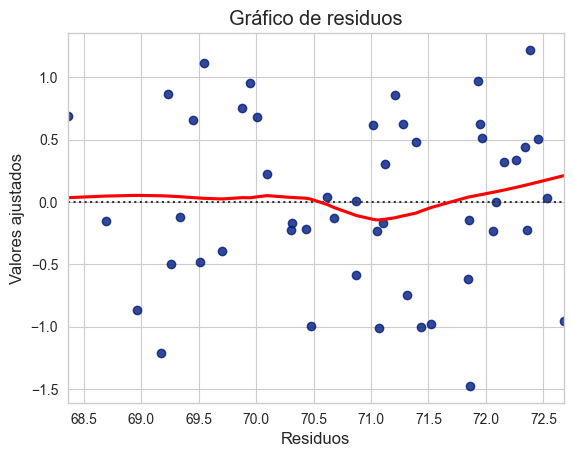

In [63]:
from sklearn.linear_model import LinearRegression

# Ajustar el modelo de regresi√≥n lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Calcular los residuos
residuos = y - modelo.predict(X)
prediccion = modelo.predict(X)
# Graficar los residuos
sns.residplot(x=modelo.predict(X), y=residuos, lowess=True, line_kws={"color": "red"})
plt.xlabel("Residuos")
plt.ylabel("Valores ajustados")
plt.title("Gr√°fico de residuos")
plt.show()

In [64]:
# Gr√°ficos
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y, prediccion, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 0].plot([y.min(), y_train.max()], [y.min(), y.max()], "k--", lw=2)
axes[0, 0].set_title("Valor predicho vs valor real", fontsize=10)
axes[0, 0].set_xlabel("Real")
axes[0, 0].set_ylabel("Predicci√≥n")
axes[0, 0].tick_params(labelsize=7)

axes[0, 1].scatter(list(range(len(y))), residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[0, 1].axhline(y=0, linestyle="--", color="black", lw=2)
axes[0, 1].set_title("Residuos del modelo", fontsize=10)
axes[0, 1].set_xlabel("id")
axes[0, 1].set_ylabel("Residuo")
axes[0, 1].tick_params(labelsize=7)


axes[1, 0].set_title("Distribuci√≥n residuos del modelo", fontsize=10, fontweight="bold")
axes[1, 0].scatter(prediccion, residuos, edgecolors=(0, 0, 0), alpha=0.4)
axes[1, 0].axhline(y=0, linestyle="--", color="black", lw=2)
axes[1, 0].set_title(
    "Residuos del modelo vs predicci√≥n", fontsize=10, fontweight="bold"
)
axes[1, 0].set_xlabel("Predicci√≥n")
axes[1, 0].set_ylabel("Residuo")
axes[1, 0].tick_params(labelsize=7)

axes[1, 1].set_title("Boxplot residuos del modelo", fontsize=10, fontweight="bold")
axes[1, 1].tick_params(labelsize=7)
axes[1, 1].boxplot(x=residuos)


# Se eliminan los axes vac√≠os
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Diagn√≥stico residuos", fontsize=12, fontweight="bold")


Text(0.5, 0.98, 'Diagn√≥stico residuos')

In [65]:
import statsmodels.api as sm

# Agregar una columna de unos para el t√©rmino independiente
X_train = sm.add_constant(X_train, prepend=True).rename(columns={"const": "intercept"})

# Ajustar el modelo de regresi√≥n lineal
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo_res = modelo.fit()

# Imprimir el resumen del modelo
print(modelo_res.summary())

# Calcular los intervalos de confianza para los coeficientes del modelo
intervalos_confianza = modelo_res.conf_int()
print("Intervalos de Confianza para los Coeficientes:")
print(intervalos_confianza)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     12.28
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.02e-07
Time:                        20:08:45   Log-Likelihood:                -42.442
No. Observations:                  40   AIC:                             102.9
Df Residuals:                      31   BIC:                             118.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         70.3069      2.171     32.